# Structure property relationship analysis

This notebook explore the different structure property relationship between the building blocks, atoms and electronic properties in COMPAS-2x

In [3]:
# Import libraries
import pandas as pd
import numpy as np
from pathlib import Path

import seaborn as sns
from matplotlib import pyplot as plt

from func import calc_atomisation_energy
from itertools import product

from colors import atoms_colors, heterocycles_colors, kde_kwargs
# Reload imported libraries automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
df = pd.read_csv(".temp/data/compas-2x.csv", index_col=0).query('charge == 0').copy()
lala = pd.read_csv(".temp/data/compas-2x-lala.csv", index_col=0)
df = df.merge(lala[['name','lala', 'stereo', 'types']])

In [5]:
# electronic properties
props = ['homo_corr','lumo_corr','gap_corr','aip_corr','aea_corr','aepe_corr']
# group by
hue_by = ['cyclobutadiene', 'pyrrole', 'borole', 'furan', 'thiophene',
       'dhdiborinine', '14diborinine', 'pyrazine', 'pyridine', 'borinine',
       'benzene', 'h', 'c', 'b', 's', 'o', 'n']

# Binned average number of atoms in a molecule.

Horizontal Bar Chart of Atomic Composition of molecules depending on the value of the electronic properties (homo, lumo, gap, aip, aea, aepe).

The horizontal bar chart illustrates the relationship between a specific molecular property *(homo, lumo, gap, aip, aea, aepe)* and atom type.  Each bar represents a bin of property values, with colors indicating different atom types. Data is filtered to include only molecules possessing 9 rings. Bins are created using 30 intervals, and the Y-axis displays mean values of the specified atom type of the molecules within that bin.

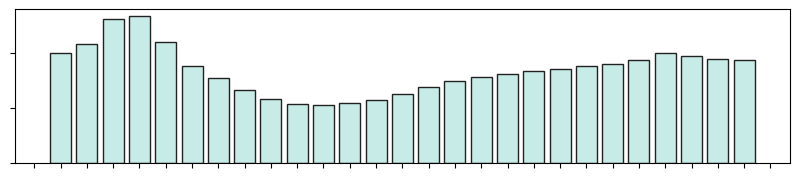

In [12]:
for i, (prop, (ring, color)) in enumerate(product(props,atoms_colors.items())):
    fig, ax = plt.subplots(figsize=(10, 2))
    bin_col = f'{prop.split("_")[0]}_bin'
    df[bin_col] = pd.cut(df[prop], bins=30)
    histogram = df.query('rings == 9').groupby(bin_col).mean(numeric_only=True)[ring].sort_index()
    ys = histogram.values
    bins = histogram.index
    xs = [str(round(b.right, 2)) for b in bins]
    ax.bar(xs, ys, color=color, edgecolor="#212121")
    # set x ticks
    ax.set_xlabel('')
    # hide x axis
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.savefig(f".temp/figures/hbar-{prop}-{ring}.png")
    plt.savefig(f".temp/figures/hbar-{prop}-{ring}.svg")
    # plt.close()
    break

    fig.suptitle(f"Color by bblock")
    plt.tight_layout()

# Binned average number of atoms in a molecule.

Horizontal Bar Chart of heterocyclic Composition of molecules depending on the value of the electronic properties (homo, lumo, gap, aip, aea, aepe).

The horizontal bar chart illustrates the relationship between a specific molecular property *(homo, lumo, gap, aip, aea, aepe)* and heterocycle type.  Each bar represents a bin of property values, with colors indicating different heterocycle. Data is filtered to include only molecules possessing 9 rings. Bins are created using 30 intervals, and the Y-axis displays mean values of the number heterocycle of the molecules within that bin.

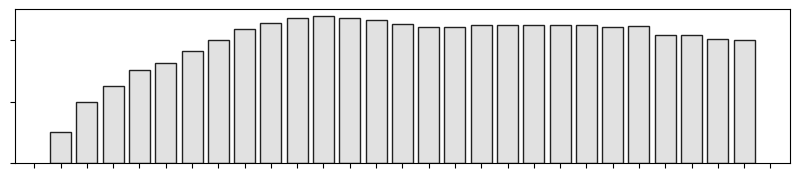

In [13]:
for i, (prop, (ring, color)) in enumerate(product(props,heterocycles_colors.items())):
    fig, ax = plt.subplots(figsize=(10, 2))
    bin_col = f'{prop.split("_")[0]}_bin'
    df[bin_col] = pd.cut(df[prop], bins=30)
    histogram = df.query('rings == 9').groupby(bin_col).mean(numeric_only=True)[ring].sort_index()
    ys = histogram.values
    bins = histogram.index
    xs = [str(round(b.right, 2)) for b in bins]
    ax.bar(xs, ys, color=color, edgecolor="#212121")
    # set x ticks
    ax.set_xlabel('')
    # hide x axis
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.savefig(f".temp/figures/hbar-{prop}-{ring}.png")
    plt.savefig(f".temp/figures/hbar-{prop}-{ring}.svg")
    # plt.close()
    break

    fig.suptitle(f"Color by bblock")
    plt.tight_layout()

 ## Stacked Bar Charts of Heterocycles in Different Molecular Properties

 The figure presents a set of stacked bar charts illustrating the distribution of various heterocyclic types within different molecular properties. Each subplot corresponds to a distinct property *(homo, lumo, gap, aip, aea, aepe)*, with the X-axis representing bins of property values. Data is filtered to include only molecules with 9 rings. This provide a condensed view of the molecular composition across different molecular properties values.

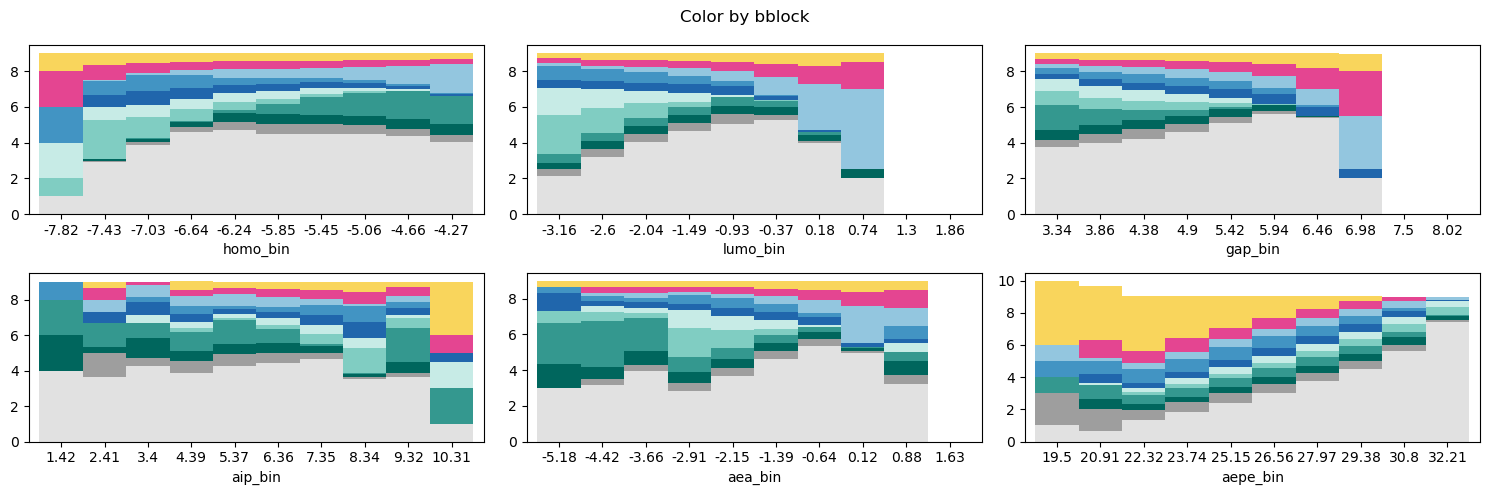

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(15, 5))
axs = axs.flatten()
for i, prop in enumerate(props):
   bin_col = f'{prop.split("_")[0]}_bin'
   df[bin_col] = pd.cut(df[prop], bins=10)
   df.query('rings == 9').groupby(bin_col).mean(numeric_only=True)[
      list(heterocycles_colors.keys())
      ].plot(kind='bar',
            stacked=True,
         #    subplots=True,
         legend=False,
         color=list(heterocycles_colors.values()),
            width=1.0,
            ax=axs[i]
            )
   bins = sorted(df[bin_col].unique())
   # set x ticks
   # axs[i].set_xlabel('')
   axs[i].set_xticklabels([str(round(b.right,2)) for b in bins], rotation=0)
   # rotate label

fig.suptitle(f"Color by bblock")
plt.tight_layout()

 ## Stacked Bar Charts of Heterocycles in Different Molecular Properties

 The figure presents a set of stacked bar charts illustrating the distribution of various atoms types within different molecular properties. Each subplot corresponds to a distinct property *(homo, lumo, gap, aip, aea, aepe)*, with the X-axis representing bins of property values. Data is filtered to include only molecules with 9 rings. This provide a condensed view of the molecular composition across different molecular properties values.

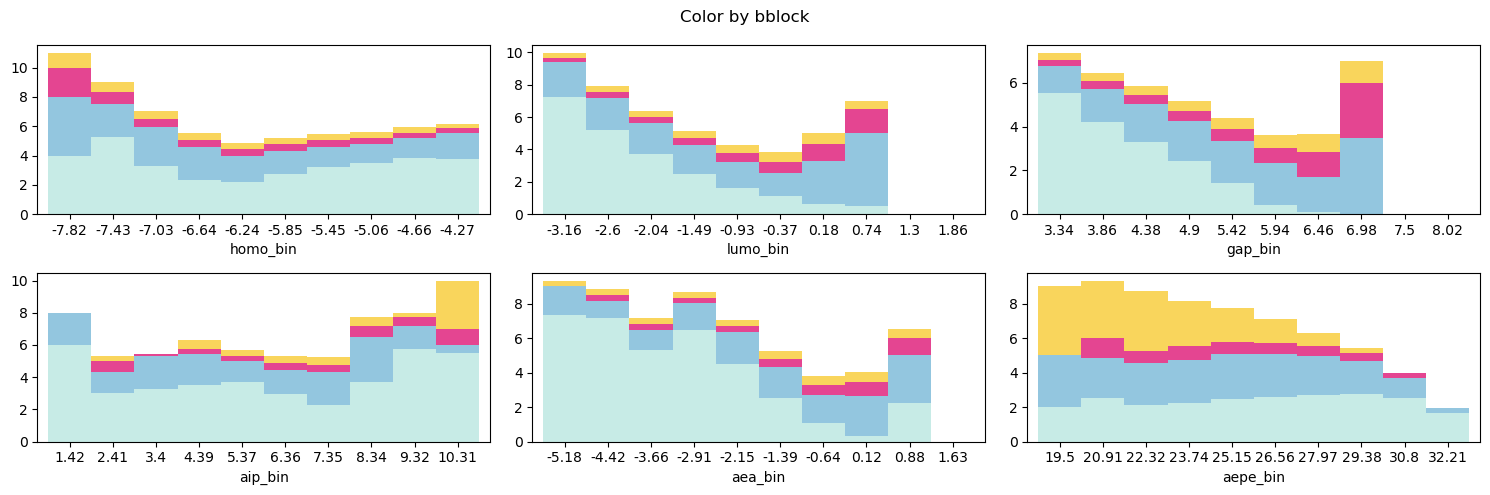

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(15, 5))
axs = axs.flatten()
for i, prop in enumerate(props):
   bin_col = f'{prop.split("_")[0]}_bin'
   df[bin_col] = pd.cut(df[prop], bins=10)
   df.query('rings == 9').groupby(bin_col).mean(numeric_only=True)[
      list(atoms_colors.keys())
      ].plot(kind='bar',
            stacked=True,
         #    subplots=True,
         legend=False,
         color=list(atoms_colors.values()),
            width=1.0,
            ax=axs[i]
            )
   bins = sorted(df[bin_col].unique())
   # set x ticks
   # axs[i].set_xlabel('')
   axs[i].set_xticklabels([str(round(b.right,2)) for b in bins], rotation=0)
   # rotate label

fig.suptitle(f"Color by bblock")
plt.tight_layout()

# Impact of Heterocycles on homo-lumo Gap Distribution

Exploring the influence of heterocycles on the distribution of homo-lumo gaps (gap_corr). Each subplot focuses on a specific number of each heterocycle type (ring).

For each heterocycle type, the homo-lumo gap distribution is visualized using a histogram, with a bin width of 0.1 and a bin range between 2.8 and 8. The y-axis is scaled to represent probabilities, providing insights into the likelihood of different energy gap values.

In [ ]:
from func import get_query

for ring, color in heterocycles_colors.items():
    data = df.query(get_query(ring))
    heterocycles_count = data[ring].unique()
    for i in heterocycles_count[:3]:
        fig, ax = plt.subplots(figsize=(8,2), dpi=300)
        sns.histplot(data=data[data[ring] == i],
                    x = 'gap_corr',
                    color=heterocycles_colors[ring],
                    binwidth=0.1,
                    binrange=(2.8,8),
                    stat='probability'
                    )
        ax.set_xlim(2.8,8)
        #hide y axis
        ax.set_yticks([])
        ax.set_xlabel('')
        ax.set_ylabel('')
        plt.savefig(f'.temp/figures/effect-of-heteorcycles/only_{ring}_{i}.png', dpi=300)
        plt.savefig(f'.temp/figures/effect-of-heteorcycles/only_{ring}_{i}.svg',)
        plt.close()